In [13]:
from keras.datasets import mnist
from sklearn.metrics import accuracy_score
import numpy as np
import time

### Load Data

In [2]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

train_X = train_X.reshape((train_X.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], -1))

print("Train Size", train_X.shape)
print("Test Size", test_X.shape)

Train Size (60000, 784)
Test Size (10000, 784)


### Random Forest

In [3]:
from sklearn.ensemble import RandomForestClassifier

#### Without PCA

In [4]:
rf = RandomForestClassifier(n_estimators=10)
start = time.time()
rf.fit(train_X, train_y)
end = time.time()
prediction = rf.predict(test_X)
accuracy = accuracy_score(prediction, test_y)
print("Random Forest without PCA training time", (end - start))
print("Random Forest without PCA accuracy", accuracy)

Random Forest without PCA training time 3.5729939937591553
Random Forest without PCA accuracy 0.9486


#### With PCA

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca = PCA(n_components=0.95)
train_X_pca = pca.fit_transform(train_X)
test_X_pca = pca.transform(test_X)

In [7]:
rf = RandomForestClassifier(n_estimators=10)
start = time.time()
rf.fit(train_X_pca, train_y)
end = time.time()
prediction = rf.predict(test_X_pca)
accuracy = accuracy_score(prediction, test_y)
print("Random Forest with PCA training time", (end - start))
print("Random Forest with PCA accuracy", accuracy)

Random Forest with PCA training time 9.104032039642334
Random Forest with PCA accuracy 0.8975


### tSNE

#### Sample data

In [8]:
idx = np.random.randint(60000, size=1000)
data = train_X[idx,:]
labels = train_y[idx]

In [9]:
from sklearn.manifold import TSNE

In [10]:
tsne = TSNE(n_components=2,init='random')
data_tsne = tsne.fit_transform(data)

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt 

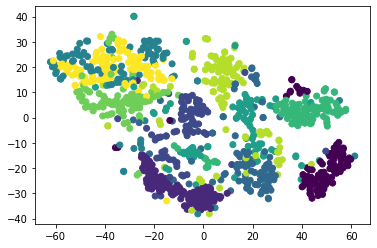

In [12]:
plt.scatter(data_tsne[:,0], data_tsne[:,1], c=labels)